# Analyze the resutls

In [3]:
import os
import pandas as pd

def read_results_to_dataframe(results_folder):
    dataframes = []
    for filename in os.listdir(results_folder):
        file_path = os.path.join(results_folder, filename)
        if os.path.isfile(file_path):
            try:
                df = pd.read_csv(file_path)
                dataframes.append(df)
            except Exception as e:
                print(f"Could not read {filename}: {e}")
    if dataframes:
        return pd.concat(dataframes, ignore_index=True)
    else:
        return pd.DataFrame()

results = read_results_to_dataframe('results')
results.sample(2)

,model,seed,accuracy,f1_score,confusion_matrix,outlier_scores,time
22,knn,43,0.680000,0.520000,"[[38, 9], [15, 13]]",[1.59874414 1.41210767 2.15004884 4.10228436 1...,NaN
0,pfgap,21415,0.667665,0.561265,"[[152, 47], [64, 71]]","[6.54353301794645e-05, 0.000632435516152912, 0...",2433.341246


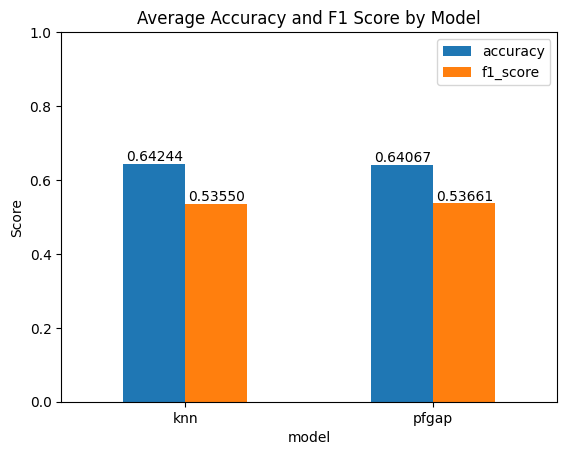

In [20]:
import matplotlib.pyplot as plt

# Group by model and calculate mean accuracy and f1_score
grouped = results.groupby('model')[['accuracy', 'f1_score']].mean()

# Plot
ax = grouped.plot(kind='bar', rot=0)
plt.ylabel('Score')
plt.title('Average Accuracy and F1 Score by Model')
plt.ylim(0, 1)

# Add numbers to the top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.5f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.show()

In [15]:
results.sort_values("seed")

,model,seed,accuracy,f1_score,confusion_matrix,outlier_scores,time
5,pfgap,43,0.640000,0.490566,"[[35, 12], [15, 13]]","[0.0031349090239567025, 0.0004499929110823628,...",NaN
22,knn,43,0.680000,0.520000,"[[38, 9], [15, 13]]",[1.59874414 1.41210767 2.15004884 4.10228436 1...,NaN
8,pfgap,48,0.666667,0.489796,"[[38, 8], [17, 12]]","[0.0003799295411980203, 0.00034241663698885946...",NaN
2,knn,48,0.626667,0.363636,"[[39, 7], [21, 8]]",[2.53089395e+00 1.24984067e+00 1.50988300e+00 ...,NaN
18,knn,112,0.653333,0.500000,"[[36, 10], [16, 13]]",[2.69946509e+00 4.69219604e+00 1.95337626e+00 ...,NaN
26,pfgap,112,0.666667,0.576271,"[[33, 13], [12, 17]]","[0.0007012529463078776, 0.0027225087959877256,...",NaN
23,knn,161,0.573333,0.483871,"[[28, 19], [13, 15]]",[2.05502905 1.41827166 1.38677887 3.06185309 2...,NaN
12,pfgap,161,0.560000,0.421053,"[[30, 17], [16, 12]]","[0.00011687635119341468, 0.0006693852105148057...",NaN
9,pfgap,436,0.600000,0.516129,"[[29, 18], [12, 16]]","[0.0001733582320241312, 0.0004951664144521565,...",NaN
20,knn,436,0.680000,0.538462,"[[37, 10], [14, 14]]",[1.08273151 1.70129605 1.06220755 1.67784898 1...,NaN


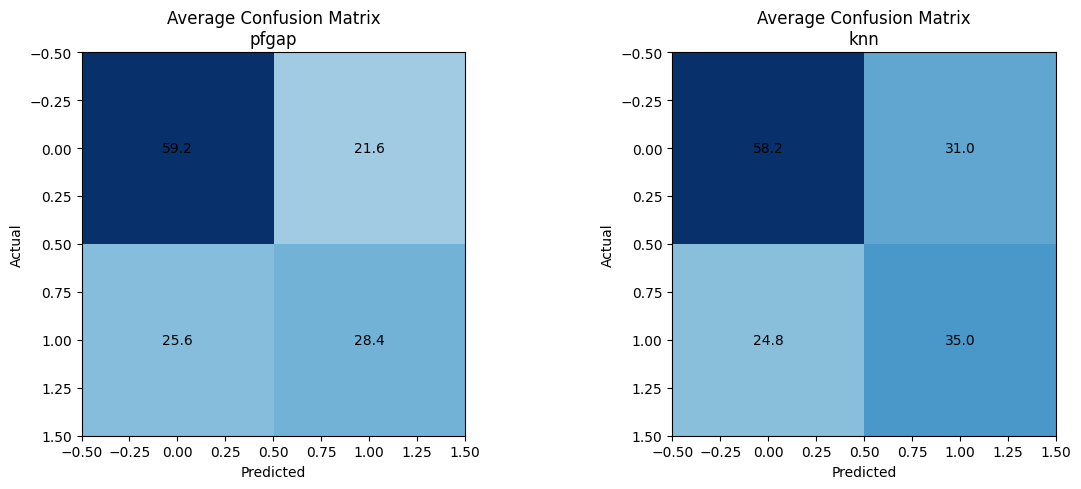

In [18]:
import numpy as np
import ast

# Calculate average confusion matrix for each model
avg_conf_matrices = {}
for model in results['model'].unique():
    matrices = results[results['model'] == model]['confusion_matrix']
    # Convert stringified lists to numpy arrays of numbers
    arrs = [np.array(ast.literal_eval(cm)) for cm in matrices]
    avg_conf_matrices[model] = np.mean(arrs, axis=0)

# Plot average confusion matrices
fig, axes = plt.subplots(1, len(avg_conf_matrices), figsize=(6 * len(avg_conf_matrices), 5))
if len(avg_conf_matrices) == 1:
    axes = [axes]
for ax, (model, avg_cm) in zip(axes, avg_conf_matrices.items()):
    im = ax.imshow(avg_cm, cmap='Blues', vmin=0)
    ax.set_title(f'Average Confusion Matrix\n{model}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    for i in range(avg_cm.shape[0]):
        for j in range(avg_cm.shape[1]):
            ax.text(j, i, f'{avg_cm[i, j]:.1f}', ha='center', va='center', color='black')
plt.tight_layout()
plt.show()

In [19]:
model_counts = results['model'].value_counts()
print(model_counts)

model
knn      14
pfgap    13
Name: count, dtype: int64


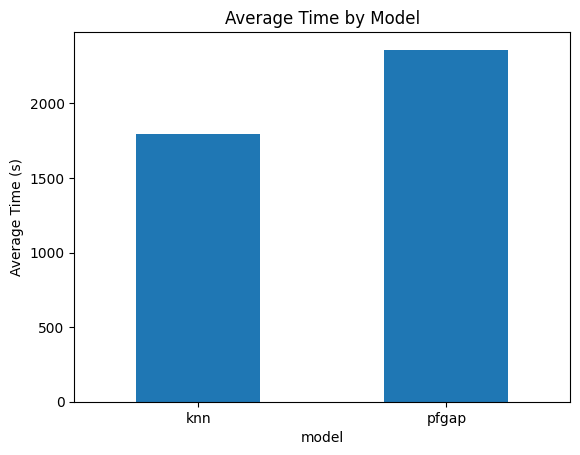

In [21]:
# Filter out rows with missing time values
time_grouped = results.dropna(subset=['time']).groupby('model')['time'].mean()

# Plot average time by model
time_grouped.plot(kind='bar', ylabel='Average Time (s)', title='Average Time by Model', rot=0)
plt.show()